# Setup

In [77]:
import pandas as pd 
import scipy.stats as stats

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

In [78]:
dataConditionA = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times Wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionA["condition"] = "Arrow"

In [79]:
dataConditionB = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times Wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionB["condition"] = "NPC"

In [80]:
timeWanderedPercentage = 0.1
def getDataNoWander(conditionData):
    finishedCondition = conditionData.loc[conditionData["time spent away from navigational aid"] >= 0]

    dataNoWander = pd.DataFrame(data={}, columns=finishedCondition.columns)
    iterator = 0
    for timeGoingForward in finishedCondition["time going forward"].values:
        timeWandering = finishedCondition["time spent away from navigational aid"].values[iterator]
        if timeWandering / timeGoingForward < timeWanderedPercentage:
            dataNoWander.loc[iterator] = finishedCondition.iloc[iterator]
        iterator+=1
    return dataNoWander

In [81]:
dataNoWanderA = getDataNoWander(dataConditionA)
dataNoWanderB = getDataNoWander(dataConditionB)

In [82]:
dataNoWanderA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times Wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow
10,A15,308.04000,498.96000,8,4,1,0.600006,Yes,Arrow
12,A20,412.84000,563.07996,6,4,2,15.359955,Yes,Arrow


In [83]:
dataNoWanderB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times Wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC
9,B12,315.52000,1318.36010,12,4,0,0.000000,Yes,NPC
10,B13,316.40000,492.32004,7,2,0,0.000000,Yes,NPC
11,B14-1,363.24000,342.12000,5,1,4,8.240021,Yes,NPC
12,B16,330.88000,352.52002,4,4,0,0.000000,Yes,NPC
14,B20,296.91998,449.36002,4,4,0,0.000000,Yes,NPC
16,B22,419.16000,336.68002,6,1,11,28.160007,Yes,NPC


In [60]:
dataNoWanderA.index.size

23

In [61]:
dataNoWanderB.index.size

21

## T-test

#### Precautions before doing t-test

In [62]:
import numpy
arrowTime = dataNoWanderA.loc[dataNoWanderA["condition"] == "Arrow", 'time going back']
arrowTime = numpy.log(arrowTime)
stats.shapiro(arrowTime)

(0.9773516058921814, 0.856484591960907)

In [63]:
npcTime = dataNoWanderB.loc[dataNoWanderB["condition"] == "NPC", 'time going back']
npcTime = numpy.log(npcTime)
stats.shapiro(npcTime)

(0.7994133830070496, 0.0006426608306355774)

In [64]:
arrowMistakes = dataNoWanderA.loc[dataNoWanderA["condition"] == "Arrow", 'mistakes made']
stats.shapiro(arrowMistakes)

(0.9249818921089172, 0.08523423224687576)

In [88]:
npcMistakes = dataNoWanderB.loc[dataNoWanderB["condition"] == "NPC", 'mistakes made']
stats.shapiro(npcMistakes)

(0.906613290309906, 0.047096770256757736)

In [89]:
stats.levene(arrowTime, npcTime)

LeveneResult(statistic=0.265709186913468, pvalue=0.6089275184689078)

In [67]:
stats.levene(arrowMistakes, npcMistakes)

LeveneResult(statistic=0.1393644850885281, pvalue=0.7107913095589564)

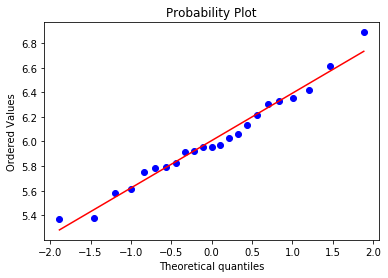

In [68]:
stats.probplot(arrowTime, plot = plt)
plt.show()

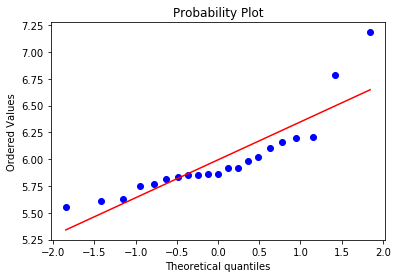

In [69]:
stats.probplot(npcTime, plot = plt)
plt.show()

#### Comparing times to go back

In [70]:
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.11923933452961098, pvalue=0.9056542689693312)

#### Comparing mistakes made

In [71]:
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=0.05448168954937816, pvalue=0.9568097347886892)